In [1]:
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator
import numpy.typing as npt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error

**Comparazione tra diversi regressori**

In questa esercitazione, utilizzeremo un dataset generato casualmente mediante il metodo [`make_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression). In particolare, il nostro dataset avrà $100$ diversi campioni, ciascuno caratterizzato da un'unica feature, e sarà affetto da rumore gaussiano con $\sigma=10$.

Iniziamo definendo la funzione ausiliaria `get_mape`, che ci servirà per ottenere le predizioni ed il MAPE di uno stimatore `rgr` sui dati di input.

In [2]:
def get_mape(
        rgr: BaseEstimator,
        X_train: npt.ArrayLike,
        X_test: npt.ArrayLike,
        y_train: npt.ArrayLike,
        y_test: npt.ArrayLike) -> tuple[npt.ArrayLike, float]:
    """ Utility per ottenere i risultati di regressione.

    Argomenti:
        rgr: algoritmo di regressione da testare
        X_train: array di train per le variabili indipendenti
        X_test: array di test per le variabili indipendenti
        y_train: array di train per le variabili dipendenti
        y_test: array di test per le variabili dipendenti
    
    Restituisce:
        Una tupla contentente le predizioni di train e test, ed il MAPE.
    """
    rgr.fit(X_train, y_train)
    y_pred_train = rgr.predict(X_train)
    y_pred_test = rgr.predict(X_test)
    return y_pred_train, \
        y_pred_test, \
        mean_absolute_percentage_error(y_test, y_pred_test)

Creiamo adesso il nostro dataset.

Dato che la `make_regression` non restituisce dati ordinati, usiamo il metodo `argsort` per ordinare `X` sulle righe, ed ottenere un vettore degli indici ordinati `p`. A partire da tale vettore andremo a riordinare sia `X`, sia `y`, facendo inoltre in modo che questi abbiano dimensioni coerenti ed accettabili dai regressori, ovvero `(n, 1)` per `X`, e `(n,)` per `y`, con `n=100` per questo specifico caso. Definiamo inoltre i dataset di train e di test.

In [3]:
X, y = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    noise=10,
    random_state=42)

p = X.argsort(axis=0)
X = X[p].reshape(-1, 1)
y = y[p].reshape(-1)
X_train = X[:70]
X_test = X[70:]
y_train = y[:70]
y_test = y[70:]

Procediamo ad estrarre le predizioni ed i valori di errore per ciascun regressore considerato, e visualizziamo le performance sui dati di training.

c:\Users\acard\.virtualenvs\pcs-exercises-4jw-2ggn\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


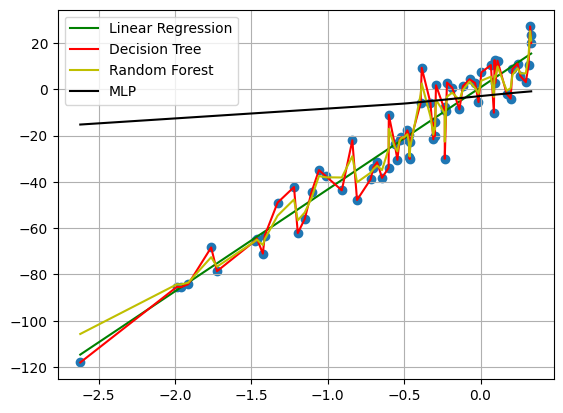

In [4]:
y_pred_lr_tr, y_pred_lr_test, lr_mape = get_mape(LinearRegression(), X_train, X_test, y_train, y_test)
y_pred_dtr_tr, y_pred_dtr_test, dtr_mape = get_mape(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)
y_pred_rfr_tr, y_pred_rfr_test, rfr_mape = get_mape(RandomForestRegressor(), X_train, X_test, y_train, y_test)
y_pred_mlpr_tr, y_pred_mlpr_test, mlpr_mape = get_mape(MLPRegressor(), X_train, X_test, y_train, y_test)

plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_lr_tr, c='g', label='Linear Regression')
plt.plot(X_train, y_pred_dtr_tr, c='r', label='Decision Tree')
plt.plot(X_train, y_pred_rfr_tr, c='y', label='Random Forest')
plt.plot(X_train, y_pred_mlpr_tr, c='k', label='MLP')
plt.grid()
plt.legend()
plt.show()

Apparentemente:

1. l'albero decisionale ottiene le performance migliori;
2. il random forest ottiene ottime performance, di poco inferiori a quelle dell'albero decisionale;
3. il regressore lineare restituisce la retta ai minimi quadrati che interpola i punti nel dataset;
4. il multi-layer perceptron presenta un errore molto alto, dovuto al fatto che non riesce a convergere.

Proviamo, però, a considerare i valori di test.

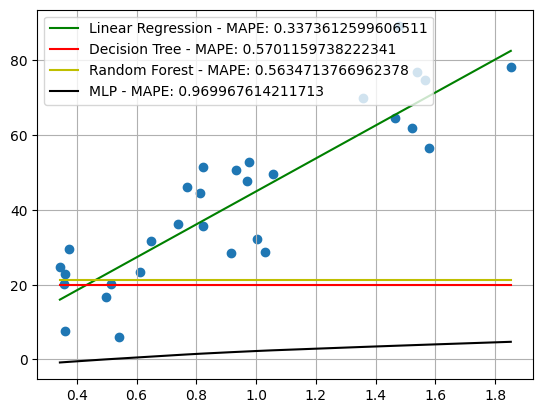

In [5]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_lr_test, c='g', label=f'Linear Regression - MAPE: {lr_mape}')
plt.plot(X_test, y_pred_dtr_test, c='r', label=f'Decision Tree - MAPE: {dtr_mape}')
plt.plot(X_test, y_pred_rfr_test, c='y', label=f'Random Forest - MAPE: {rfr_mape}')
plt.plot(X_test, y_pred_mlpr_test, c='k', label=f'MLP - MAPE: {mlpr_mape}')
plt.grid()
plt.legend()
plt.show()

La situazione cambia decisamente. Infatti, laddove il regressore lineare è comunque in grado di seguire i nuovi dati, tutti gli altri algoritmi presentano delle prestazioni inadeguate. Questo è legato al fenomeno dell'*overfitting*.